In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

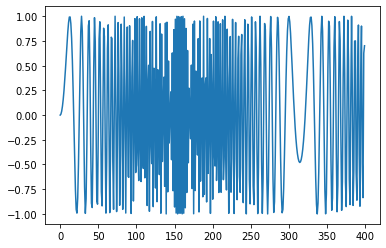

In [33]:
series = np.sin((0.1 * np.arange(400)) ** 2)
plt.plot(series)
plt.show()

In [34]:
# build a dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T) :
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T) # N x T
Y = np.array(Y)
N = len(X)
print(f"X.shape{X.shape}, Y.shape:{Y.shape}")

X.shape(390, 10), Y.shape:(390,)


In [35]:
# make a model
i = Input(shape= (T,) )
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
# train the Model
r = model.fit(
    X[:-N//2], Y[:-N//2], epochs = 80, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80
7/7 [==============================] - 0s 17ms/step - loss: 1.4273 - val_loss: 0.7134
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 0.6356 - val_loss: 0.5675
Epoch 3/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5951 - val_loss: 0.6810
Epoch 4/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5710 - val_loss: 0.6849
Epoch 5/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5372 - val_loss: 0.6202
Epoch 6/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5370 - val_loss: 0.6429
Epoch 7/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5350 - val_loss: 0.6650
Epoch 8/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5266 - val_loss: 0.6432
Epoch 9/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5052 - val_loss: 0.5886
Epoch 10/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5114 - val_loss: 0.5987
Epoch 11/80
7/7 [=====================

In [37]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


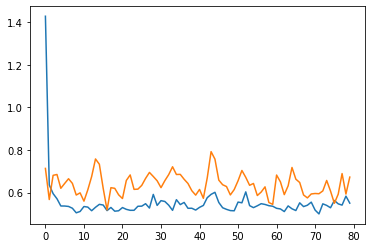

In [38]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')


In [39]:
outputs = model.predict(X)
print(outputs.shape)

(390, 1)


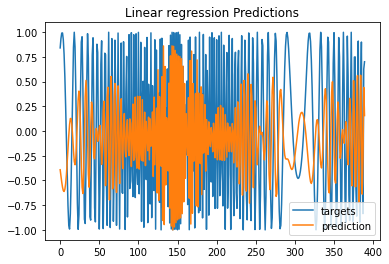

In [40]:
predictions = outputs[:, 0]
plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'prediction')
plt.title("Linear regression Predictions")
plt.legend()
plt.show()

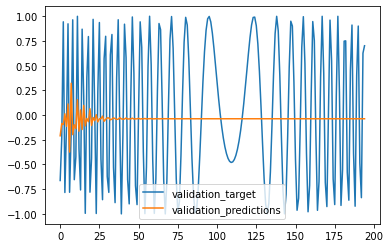

In [41]:
# Forecast Future values
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target) :
    p = model.predict(last_x.reshape(1, -1 , 1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()

### RNN

In [47]:
## build a RNN model
X = X.reshape(-1, T, 1) # N * T * D

i = Input(shape = (T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer= Adam(lr = 0.05))

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [48]:
# train the Model
r = model.fit(
    X[:-N//2], Y[:-N//2], batch_size= 32, epochs = 200, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/200
7/7 [==============================] - 1s 53ms/step - loss: 0.5370 - val_loss: 0.5451
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5272 - val_loss: 0.5422
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4939 - val_loss: 0.5980
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4846 - val_loss: 0.6404
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4552 - val_loss: 0.5104
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4130 - val_loss: 0.5192
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3663 - val_loss: 0.5079
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2912 - val_loss: 0.4219
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2313 - val_loss: 0.6261
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2537 - val_loss: 0.3558
Epoch 11/200
7/7 [==========

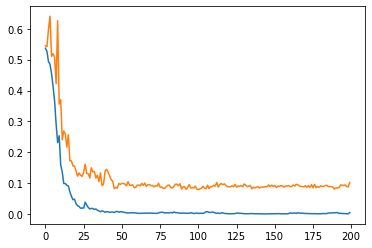

In [49]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')


In [50]:
outputs = model.predict(X)
print(outputs.shape)

(390, 1)


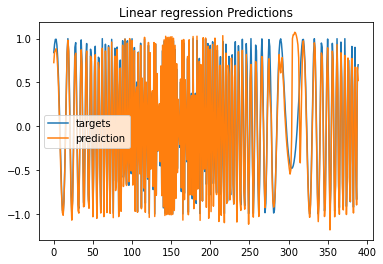

In [51]:
predictions = outputs[:, 0]
plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'prediction')
plt.title("Linear regression Predictions")
plt.legend()
plt.show()